## Fahd Iqbal 
## studentId:27491042

In [23]:
#for analysis
import pandas as pd
import numpy as np
from scipy import stats
from pandas.api.types import is_numeric_dtype
import Levenshtein as lev
import re
#for visulization 
import seaborn as sns
import matplotlib.pyplot as plt
 

###### Loaded the proper libraries needed

###### Creating the Data Frame by Loading in the data



##### Displaying the Data 

In [2]:
df = pd.read_csv('Portal_rodents_19772002_scinameUUIDs.csv', engine='python')
df


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,...,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,13.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,23.0,...,0F7659,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,77.0,...,701178,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,NaN,32.0,...,NaN,NaN,0,NaN,0,0.0,NaN,NaN,UT,NaN


##### Creating a faceting function to group column values

In [4]:
def faceting(df,col_name): 
#col_name is a string
# datafram i want to group by this particular column and 
#i want to show this particular column then after the group by i want t aggrigate by count
    return df.groupby([col_name])[col_name].agg(['count'])
faceting(df,'scientificName')



        


,count
scientificName,
Amphispiza bilineata,1
Amphispiza bilineata,1
Ammodramus savannarum,2
Ammospermophilis harrisi,1
Ammospermophilus harrisi,435
Ammospermophilus harrisii,1
Amphespiza bilineata,7
Amphispiza bilineata,289
Amphispiza bilineatus,1


###### there is typo mistakes, space mistakes these are things you have to notice during wraggling 
###### to fix spaces this you would want to use the strip function 
#####  the Scientific Name column has been added to the end of the DataFrame 

In [5]:
def strpping(df,str):
#stripping the origional column then dropping the old one from the data set and readding it 
    df2=pd.DataFrame(df[str].str.strip())
   
    df2.columns=[str]
    del df[str]
    df=pd.concat([df,df2],axis=1)
    
    return df
#returns a dataframe
    


In [6]:
df
pd.set_option('display.max_columns', None)

###### Testing the Strip Function

In [7]:
df5=strpping(df,'scientificName')
df5

,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,species,locality,JSON,decimalLatitude,decimalLongitude,county,state,country,sex,age,reprod,testes,vagina,pregnant,nipples,lactation,hfl,wgt,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5,scientificName
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,36.0,AB,"Winterthur Gardens, Delaware",NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amphispiza bilineata
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,13.0,27.0,AB,"Winterthur Gardens, Delaware",NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amphispiza bilineata
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,AS,FL; Highlands Co.; near parking area and natur...,NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,Ammodramus savannarum
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,AS,"Swampy woodland, 2 miles E of Tallahassee.","{\n""engineVersion"" : ""GLC:4.94|U:1.01374|eng:1...",30.438056,-84.247155,Leon,Florida,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ammodramus savannarum
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,72.0,AH,Muscogee-Rerdido [Perdido] River.,"{\n""engineVersion"" : ""GLC:4.94|U:1.01374|eng:1...",30.449720,-87.381670,Escambia,Florida,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ammospermophilis harrisi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,23.0,PB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,Z,NaN,NaN,NaN,NaN,NaN,NaN,26.0,29.0,0F7659,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,77.0,PB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,Z,NaN,NaN,NaN,NaN,NaN,NaN,27.0,34.0,701178,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,64.0,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,NaN,32.0,RM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,R,NaN,15.0,14.0,NaN,NaN,0,NaN,0,0.0,NaN,NaN,UT,NaN,NaN


###### Here i am splitting the scintific Name column into two columns

In [8]:
df5[['First','Last']] = df5.scientificName.str.split(expand=True) 
df5
 



,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,species,locality,JSON,decimalLatitude,decimalLongitude,county,state,country,sex,age,reprod,testes,vagina,pregnant,nipples,lactation,hfl,wgt,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5,scientificName,First,Last
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,36.0,AB,"Winterthur Gardens, Delaware",NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amphispiza bilineata,Amphispiza,bilineata
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,13.0,27.0,AB,"Winterthur Gardens, Delaware",NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amphispiza bilineata,Amphispiza,bilineata
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,AS,FL; Highlands Co.; near parking area and natur...,NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,Ammodramus savannarum,Ammodramus,savannarum
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,AS,"Swampy woodland, 2 miles E of Tallahassee.","{\n""engineVersion"" : ""GLC:4.94|U:1.01374|eng:1...",30.438056,-84.247155,Leon,Florida,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ammodramus savannarum,Ammodramus,savannarum
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,72.0,AH,Muscogee-Rerdido [Perdido] River.,"{\n""engineVersion"" : ""GLC:4.94|U:1.01374|eng:1...",30.449720,-87.381670,Escambia,Florida,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ammospermophilis harrisi,Ammospermophilis,harrisi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,23.0,PB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,Z,NaN,NaN,NaN,NaN,NaN,NaN,26.0,29.0,0F7659,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,77.0,PB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,Z,NaN,NaN,NaN,NaN,NaN,NaN,27.0,34.0,701178,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,64.0,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,NaN,32.0,RM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,R,NaN,15.0,14.0,NaN,NaN,0,NaN,0,0.0,NaN,NaN,UT,NaN,NaN,NaN,NaN


#### Created a sorting function that takes in 2 column values to sort by

In [9]:
def sorting(df,str1,str2):
    return df.sort_values([str1,str2], ascending=True)

#### Testing the sortingFunction

In [10]:
sorting(df5,'yr','dy')

,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,species,locality,JSON,decimalLatitude,decimalLongitude,county,state,country,sex,age,reprod,testes,vagina,pregnant,nipples,lactation,hfl,wgt,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5,scientificName,First,Last
1028,e9d1d62d-8ef9-4b89-aec6-64c57d317633,420,12,10,1977,6.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,NaN,11.0,DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,Z,NaN,NaN,NaN,NaN,NaN,NaN,38.0,48.0,4871,NaN,0,NaN,0,0.0,NaN,0.0,NaN,NaN,Dipodomys merriami,Dipodomys,merriami
1029,2ab038d7-80b0-47a1-bf32-dfe98984e37d,422,12,10,1977,6.0,aeece3f0-4acf-4aaa-87cd-e04ac6c8ad2c,2,NaN,13.0,DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,Z,NaN,NaN,NaN,NaN,NaN,NaN,37.0,42.0,4834,NaN,0,NaN,0,0.0,NaN,0.0,NaN,NaN,Dipodomys merriami,Dipodomys,merriami
1030,569ac0f2-f121-45e4-90e2-d3341bed85f9,423,12,10,1977,6.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,NaN,15.0,DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,Z,NaN,NaN,NaN,NaN,NaN,NaN,36.0,42.0,4857,NaN,0,NaN,0,0.0,NaN,0.0,NaN,NaN,Dipodomys merriami,Dipodomys,merriami
1031,5aba5f21-4781-4555-befc-b40df906ee7d,424,12,10,1977,6.0,aeece3f0-4acf-4aaa-87cd-e04ac6c8ad2c,2,NaN,16.0,DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,Z,NaN,NaN,NaN,NaN,NaN,NaN,37.0,52.0,4826,NaN,0,NaN,0,0.0,NaN,0.0,NaN,NaN,Dipodomys merriami,Dipodomys,merriami
1032,cd2927cc-30d7-41e3-9f2c-7bcd6c2ff9f9,425,12,10,1977,6.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,NaN,17.0,DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,Z,NaN,NaN,NaN,NaN,NaN,NaN,36.0,38.0,4895,NaN,0,NaN,0,0.0,NaN,0.0,NaN,NaN,Dipodomys merriami,Dipodomys,merriami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35544,5e05640b-d193-482a-9e8d-10608f4e810b,35542,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,23.0,PB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,Z,NaN,NaN,NaN,NaN,NaN,NaN,26.0,29.0,0F7659,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35545,a6bbdcbb-2c0a-4d3f-85a0-62a73270a108,35543,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,77.0,PB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,Z,NaN,NaN,NaN,NaN,NaN,NaN,27.0,34.0,701178,NaN,0,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35546,67137ae7-0919-49c3-bd8f-4afda8162994,35544,12,31,2002,295.0,6a090985-a7ce-4c04-b146-9b401d1dd796,15,NaN,64.0,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35547,2bcb411b-9e81-42f6-a8db-aff0f863b564,35547,12,31,2002,295.0,c85de67c-1590-4129-8953-0c530a565585,10,NaN,32.0,RM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,R,NaN,15.0,14.0,NaN,NaN,0,NaN,0,0.0,NaN,NaN,UT,NaN,NaN,NaN,NaN


##### filtering data out of the dataset

In [11]:
def filteringForType(df,str1,str2):
    fft=df[str1]==str2
    #test_df=df.loc[df[str1] == str2] is an alternative way
    return df[fft]


##### Testing the filter function 

In [12]:
filteringForType(df5,'scientificName','Ammodramus savannarum')

,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,species,locality,JSON,decimalLatitude,decimalLongitude,county,state,country,sex,age,reprod,testes,vagina,pregnant,nipples,lactation,hfl,wgt,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5,scientificName,First,Last
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,AS,FL; Highlands Co.; near parking area and natur...,NaN,NaN,NaN,NaN,NaN,UNITED STATES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,Ammodramus savannarum,Ammodramus,savannarum
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,AS,"Swampy woodland, 2 miles E of Tallahassee.","{\n""engineVersion"" : ""GLC:4.94|U:1.01374|eng:1...",30.438056,-84.247155,Leon,Florida,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ammodramus savannarum,Ammodramus,savannarum


##### Creating a contains function will show true if the word is there

In [18]:

def containsIn(df,col_name,str1,case_sensitive=False):
    df1= df.loc[df[col_name].str.contains(pat=str1,case=case_sensitive,na=False)]
    return df1



##### Here I am testing the Fucntion to see if the dataframe column contains a words with a pattern 

In [22]:
containsIn(df5,'scientificName',"bai",False)

,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,species,locality,JSON,decimalLatitude,decimalLongitude,county,state,country,sex,age,reprod,testes,vagina,pregnant,nipples,lactation,hfl,wgt,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5,scientificName,First,Last
740,d1f082cc-87df-4883-a0a9-4f04a51610c1,16598,11,4,1989,140.0,312118f6-f394-4c17-a4ee-869a14ba5d75,21,NaN,15.0,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,S,NaN,NaN,NaN,NaN,13.0,7.0,1,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Baiomys taylori,Baiomys,taylori
741,9e9e2446-7a5f-4118-abbe-d1beae266d45,16599,11,4,1989,140.0,312118f6-f394-4c17-a4ee-869a14ba5d75,21,NaN,15.0,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,R,NaN,NaN,NaN,NaN,12.0,6.0,2,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Baiomys taylori,Baiomys,taylori
742,49e9f2ad-c853-4380-8e91-15e6839c20a1,16854,12,5,1989,141.0,b564c1fc-bd87-4525-92ee-8bb36928fc10,3,NaN,56.0,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,Z,NaN,NaN,NaN,NaN,NaN,NaN,14.0,8.0,1064,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Baiomys taylori,Baiomys,taylori
743,37402131-e742-4a5a-8b10-d94fdeb6515f,16951,1,7,1990,142.0,c5e12154-6677-4d6c-8feb-52355cbc1f78,5,NaN,41.0,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,Z,NaN,NaN,NaN,NaN,NaN,NaN,13.0,9.0,4,NaN,0,NaN,0,NaN,NaN,NaN,NaN,R,Baiomys taylori,Baiomys,taylori
744,3cb5709b-5f16-4b3f-89fd-9810fa1e741d,17174,2,25,1990,144.0,c5e12154-6677-4d6c-8feb-52355cbc1f78,5,NaN,13.0,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,M,NaN,NaN,NaN,NaN,14.0,7.0,10,NaN,0,NaN,0,NaN,NaN,NaN,NaN,R,Baiomys taylori,Baiomys,taylori
745,3169a907-2862-4f3d-9df2-f72cb83136b4,17190,2,25,1990,144.0,c5e12154-6677-4d6c-8feb-52355cbc1f78,5,NaN,24.0,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,NaN,E,NaN,14.0,7.0,4,NaN,0,NaN,0,NaN,NaN,NaN,NaN,R,Baiomys taylori,Baiomys,taylori
746,6b3f64a6-3dd7-4d31-81cb-640250029e14,17374,4,24,1990,146.0,b7eb122e-a7c4-4982-97a0-fa67e45e6faf,1,NaN,17.0,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,S,NaN,NaN,NaN,NaN,14.0,7.0,4,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Baiomys taylori,Baiomys,taylori
747,cd778d4c-d2b8-4e33-87c1-4bcfcc9f5004,17486,4,26,1990,146.0,b564c1fc-bd87-4525-92ee-8bb36928fc10,3,NaN,77.0,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,S,NaN,NaN,NaN,NaN,14.0,7.0,4,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Baiomys taylori,Baiomys,taylori
748,d90dc96c-9a3d-423c-beec-b5993b974e97,17566,5,25,1990,147.0,b564c1fc-bd87-4525-92ee-8bb36928fc10,3,NaN,46.0,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,NaN,P,E,NaN,14.0,10.0,4,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Baiomys taylori,Baiomys,taylori
749,b90222e2-ae3f-4422-ab27-db41e40b3713,17616,6,22,1990,148.0,b564c1fc-bd87-4525-92ee-8bb36928fc10,3,NaN,17.0,BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,Z,NaN,NaN,NaN,NaN,NaN,NaN,14.0,8.0,4,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Baiomys taylori,Baiomys,taylori


###### quantDDA is the function that will show number of observations
###### number of entries, number of unique entries, number of missing entries, number of outliers,
###### number of extreme values ,mode, or modes,mean,standard deviation
###### max,min, Q3, Q2 (median), Q1, skewness,and the kurtosis

In [17]:
def quantDDA(df):
    pandas_stats_df=df.describe().T
    Q1=df.describe().loc['25%']
    Q3=df.describe().loc['75%']
    IQR=Q3-Q1
    IQR_df=pd.DataFrame(IQR)
    IQR_df.columns=['IQR']
    output_df=pd.concat([pandas_stats_df,IQR_df],axis=1)
    lower_value= Q1-(1.5*IQR)
    lower_value
    upper_value= Q3+(1.5*IQR)
    upper_value
    outliers =pd.DataFrame(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())
    outliers.columns=['Count_Outliers']
    extremes_df =pd.DataFrame(((df < (Q1 - 3.0 * IQR)) | (df > (Q3 + 3.0 * IQR))).sum())
    extremes_df.columns=['Count_Of_Extremes']
    
    list_of_columns=list(df.columns)
    stats_dict={}
    for x in list_of_columns: 
        if(is_numeric_dtype(df[x])):
            #stats.describe(df[x])
            skewness=stats.describe(df[x]).skewness
            variance=stats.describe(df[x]).variance
            kurtosis=stats.describe(df[x]).kurtosis
            number_of_obs=stats.describe(df[x]).nobs
            stats_dict[x]={'Nobs':number_of_obs, 'skewness':skewness, 'variance':variance, 'kurtosis':kurtosis}


    new_df=pd.DataFrame(df.nunique())
    new_df.columns=['Unique_Values']
    null_df=pd.DataFrame(df.isnull().sum())
    null_df.columns=['Null_Values']
    
    stats_df=pd.DataFrame(stats_dict).T
    mode_df=df.mode(axis=0,numeric_only=True).dropna().T
    mode_df.columns=['Mode']
    outputdf=pd.concat([output_df,outliers,extremes_df,stats_df,mode_df,new_df,null_df],axis=1)
    
    
  

    return outputdf

###### vizDDA is the function that will display the plot relationships between the data

In [18]:
def vizDDA(df):
    return sns.pairplot(df)


###### Testing the quantDDA on data set

In [19]:
quantDDA(df5)


,count,mean,std,min,25%,50%,75%,max,IQR,Count_Outliers,Count_Of_Extremes,Nobs,skewness,variance,kurtosis,Mode,Unique_Values,Null_Values
recordID,35549.0,17775.000000,10262.256696,1.00000,8888.000000,17775.000000,26662.000000,35549.00000,17774.000000,0,0,35549.0,0.000000,1.053139e+08,-1.200000,1.000000,35549,0
mo,35549.0,6.474022,3.396583,1.00000,4.000000,6.000000,9.000000,12.00000,5.000000,0,0,35549.0,0.051482,1.153677e+01,-1.204926,7.000000,12,0
dy,35549.0,16.105966,8.256691,1.00000,9.000000,16.000000,23.000000,31.00000,14.000000,0,0,35549.0,0.018058,6.817294e+01,-1.064188,16.000000,31,0
yr,35549.0,1990.475231,7.493355,1977.00000,1984.000000,1990.000000,1997.000000,2002.00000,13.000000,0,0,35549.0,-0.044144,5.615037e+01,-1.284761,1997.000000,26,0
period,35549.0,149.534263,97.092749,-284.00000,73.000000,149.000000,234.000000,295.00000,161.000000,70,0,35549.0,-0.408540,9.427002e+03,-0.313386,-44.500000,322,0
plot,35549.0,11.397001,6.799406,1.00000,5.000000,11.000000,17.000000,24.00000,12.000000,0,0,35549.0,0.121428,4.623192e+01,-1.147831,12.000000,24,0
note1,3592.0,7.322105,4.216711,1.00000,5.000000,6.000000,13.000000,13.00000,8.000000,0,0,35549.0,NaN,NaN,NaN,13.000000,11,31957
stake,35479.0,44.804138,23.453326,-99.00000,25.000000,45.000000,64.000000,99.00000,39.000000,94,94,35549.0,NaN,NaN,NaN,11.000000,80,70
decimalLatitude,60.0,42.510023,6.328684,28.63444,45.390723,45.450000,45.597618,46.33778,0.206895,21,18,35549.0,NaN,NaN,NaN,45.390995,12,35489
decimalLongitude,60.0,-109.475797,12.551608,-115.94270,-115.920298,-115.855953,-115.038401,-82.35944,0.881897,12,12,35549.0,NaN,NaN,NaN,-115.942700,12,35489


##### Showing scatter plots with all data 

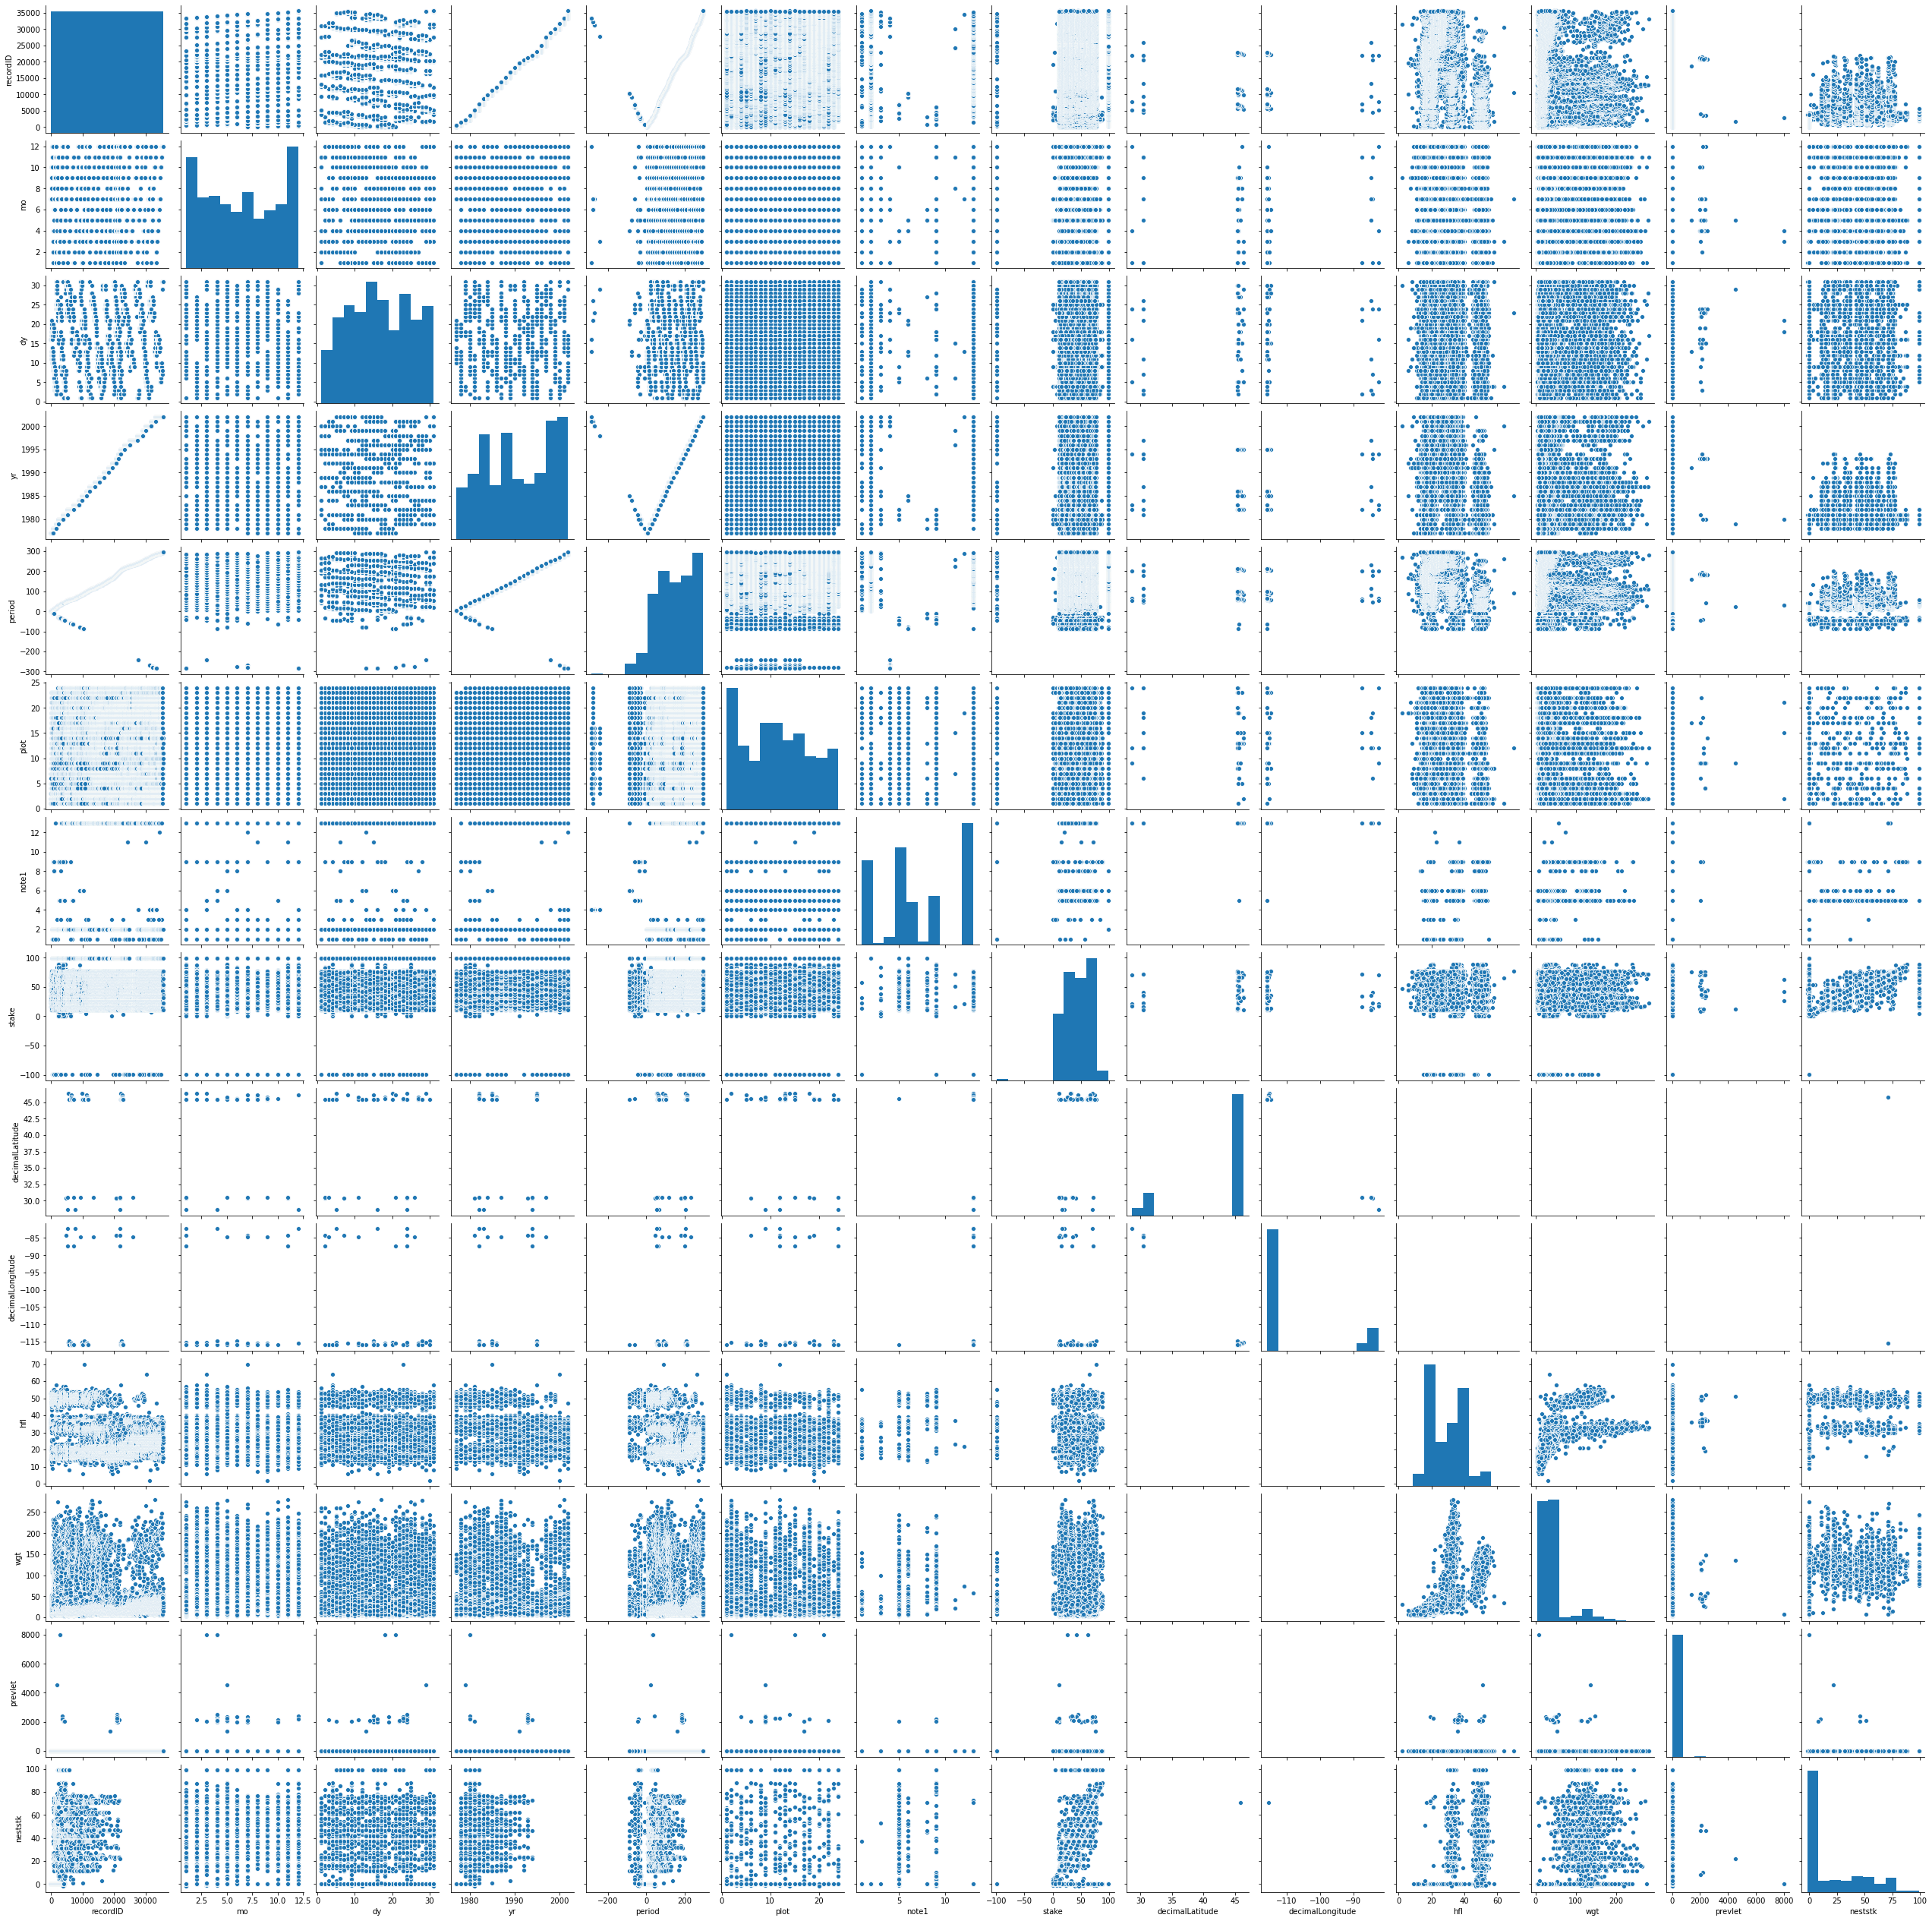

In [20]:
vizDDA(df5)

##### Trying to cluster using Levenshtein

In [41]:

df6=df5['scientificName']
i=0
#print(df5)
j=1
df7=df6.dropna()
list2=df7.tolist()
while i < len(list2)-1:
    j=i+1
    
    if(lev.ratio(list2[i],list2[j])>.80):
        
        #print(list2[j])
        list2[j]=list2[i]
        #print(df5[i])
        #print(df5[j])
    i+=1
#print(lev.ratio("HIL","hil")
#print(list2)
df4=pd.DataFrame(list2)
df4.columns=['ScientificName']

##### Testing clustering on scientific Name

In [39]:
faceting(df4,'Unique_Values')

,count
Unique_Values,
Ammodramus savannarum,2
Ammospermophilis harrisi,437
Amphespiza bilineata,299
Amphispiza bilineata,2
Baiomys taylori,46
Calamospiza melanocorys,1
Callipepla squamata,1
Campylorhynchus brunneicapillus,1
Chaetodipus baileyi,2


#### A function to create a scatter plot

In [67]:
def create_scatterPlt(df,col_name1,col_name2):
    f3,ax3 = plt.subplots()
    ax3.scatter(df[col_name1], df[col_name2],color='black')
    
    ax3.set_xlabel(col_name1)
    ax3.set_ylabel(col_name2)
    ax3.set_xticks(np.arange(0,60,5),minor=True)
    ax3.set_yticks(np.arange(0,10,1),minor=True)
    ax3.grid(which='minor', alpha=0.5,)
    ax3.grid(which='minor', alpha=1)
    ax3.plot([0,60],[0,0.16*60], color='black')
    #ax3.set_title(col_name1, col_name2)
    #f3.text(0.78, 0.68, '16%', ha='center', va='center', rotation=0, fontsize=12, color='grey')
    return ax3

#### Testing the Scatter Plot 

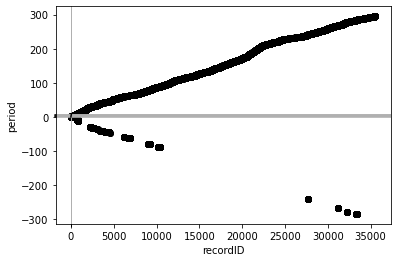

In [69]:

create_scatterPlt(df5,'recordID','period')